<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](032_GDAL_mosaicing_and_masking.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](030_NASA_MODIS_Earthdata.ipynb)



# 031 Manipulating data: `numpy`


## Purpose


While Python has a rich set of modules and data types by default, for numerical computing you'll be using two main libraries that conform the backbone of the [Python scientific stack](https://scipy.org/about.html). These libraries implement a great deal of functionality related to mathematical operations and efficient computations on large data volumes. These libraries are [`numpy`](http://numpy.org) and [`scipy`](http://scipy.org). `numpy`, which we will concentrate on in this section, deals with efficient arrays, similar to lists, that simplify many common processing operations. Of course, just doing calculations isn't much fun if you can't plot some results. To do this, we use the [`matplotlib`](http://matplotlib.org) library that we have seen in previous sessions.


### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [003 Getting help](003_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [012 String formatting](012_Python_strings.ipynb)
* [013_Python_string_methods](013_Python_string_methods.ipynb)
* [020_Python_files](020_Python_files.ipynb)
* [021 Streams](021_Streams.ipynb)
* [022 Read write files](022_Read_write_files.ipynb)
* [023 Plotting](023_Plotting.ipynb)
* [024_Image_display](024_Image_display.ipynb)
* [030_NASA_MODIS_Earthdata](030_NASA_MODIS_Earthdata.ipynb)


## `numpy`

### Introduction to arrays

You import the `numpy` library using

    import numpy as np
    
This means that all the functionality of `numpy` is accessed by the prefix `np.`: e.g. `np.array`. The main element of `numpy` is the numpy array. 

An array is in some ways like the [list object we have seen before](014_Python_groups.ipynb#list), but unlike a list, all the elements are of the same type, for example floating point numbers. Further, the range of things we can do with a `numpy` list is much greater than with the basic list.

In [1]:
import numpy as np  # Import the numpy library

# Example 1
# An array with 5 ones
arr = np.ones(5)
print(f'--> Array with 5 ones:\n{arr}')

# type
print(f'--> type of array:\n{type(arr)}')
assert type(arr) == np.ndarray

# Example 2
arr = np.array([1, 2, 3, 4])
print(f'--> Array started from a list of integers:\n{arr}')

# Example 3
# An array started from a list of numbers, what's the difference??
arr = np.array([1., 2, 3, 4])
print(f'--> Array started from a list of floats (some implicit):\n{arr}')


--> Array with 5 ones:
[1. 1. 1. 1. 1.]
--> type of array:
<class 'numpy.ndarray'>
--> Array started from a list of integers:
[1 2 3 4]
--> Array started from a list of floats (some implicit):
[1. 2. 3. 4.]


In the example above we have generated an array where all the elements are `1.0`, using [`np.ones`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), and then we have been able to generate arrays from lists using the [`np.array`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) function. The difference between the 2nd and 3rd examples is that in the 2nd example, all the elements of the list are integers, and in the 3rd example, one is a floating point number. `numpy` automatically makes the array floating point by converting the integers to floating point numbers.



We saw in an [earlier session](011_Python_data_types.ipynb#Conversion-between-data-types) how we could convert a floating point number to integer with:


In [2]:
float_version = 10.5
print(f'float version: {float_version}')

# convert individual number to int
int_version = int(float_version)
print(f'int version  : {int_version}')

float version: 10.5
int version  : 10


We can similarly convert between numpy data types (where appropriate) with `np.astype()`:

In [3]:
# An array started from a list of numbers, what's the difference??
float_version = np.array([1., 2., 3., 4.])
print(f'float version: {float_version}')

# convert whole array to int
int_version = float_version.astype(np.int)
print(f'int version  : {int_version}')

float version: [1. 2. 3. 4.]
int version  : [1 2 3 4]


### Array arithmetic

What else can we do with arrays? Perhaps the most significant thing is that can efficiently operate all array elements without loops, by treating the array as an object:

In [4]:
arr = np.ones(10)
print(f'2 x {arr} \n  = {2 * arr}')

2 x [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
  = [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


`numpy` is clever enough to figure out that the 2 multiplying the array is applied to all elements of the array, and returns an array of the same size as `arr` with the elements of `arr` multiplied by 2. We can also multiply two arrays of the same size. So let's create an array with the numbers 0 to 9 and one with the numbers 9 to 0 and do a times table:

In [5]:
arr1 = 9 * np.ones(10).astype(np.int)
arr2 = np.arange(1, 11)  # arange gives an array from 1 to 11, 11 not included

print(arr1)
print(arr2)

print(arr1 * arr2)

[9 9 9 9 9 9 9 9 9 9]
[ 1  2  3  4  5  6  7  8  9 10]
[ 9 18 27 36 45 54 63 72 81 90]


#### Exercise 1

* Using code similar to the above and a `for` loop, write the times tables for 2 to 10. The solution you're looking for should look a bit like this:

        [ 2  4  6  8 10 12 14 16 18 20]
        [ 3  6  9 12 15 18 21 24 27 30]
        [ 4  8 12 16 20 24 28 32 36 40]
        [ 5 10 15 20 25 30 35 40 45 50]
        [ 6 12 18 24 30 36 42 48 54 60]
        [ 7 14 21 28 35 42 49 56 63 70]
        [ 8 16 24 32 40 48 56 64 72 80]
        [ 9 18 27 36 45 54 63 72 81 90]
        [ 10  20  30  40  50  60  70  80  90 100]

In [6]:
# ANSWER
# dont forget to import numpy
import numpy as np

msg = '''
Using code similar to the above and a `for` loop, 
write the times tables for 2 to 10. 
The solution you're looking for should look a bit like this:

        [ 2  4  6  8 10 12 14 16 18 20]
        [ 3  6  9 12 15 18 21 24 27 30]
        [ 4  8 12 16 20 24 28 32 36 40]
        [ 5 10 15 20 25 30 35 40 45 50]
        [ 6 12 18 24 30 36 42 48 54 60]
        [ 7 14 21 28 35 42 49 56 63 70]
        [ 8 16 24 32 40 48 56 64 72 80]
        [ 9 18 27 36 45 54 63 72 81 90]
        [ 10  20  30  40  50  60  70  80  90 100]
'''
print(msg)

# set up the core array as integers
arr1 = np.ones(10).astype(int)

# for over 2 to 10
for n in np.arange(1,11):
    print(f'{n:2d} x . -> {arr1*n}')


Using code similar to the above and a `for` loop, 
write the times tables for 2 to 10. 
The solution you're looking for should look a bit like this:

        [ 2  4  6  8 10 12 14 16 18 20]
        [ 3  6  9 12 15 18 21 24 27 30]
        [ 4  8 12 16 20 24 28 32 36 40]
        [ 5 10 15 20 25 30 35 40 45 50]
        [ 6 12 18 24 30 36 42 48 54 60]
        [ 7 14 21 28 35 42 49 56 63 70]
        [ 8 16 24 32 40 48 56 64 72 80]
        [ 9 18 27 36 45 54 63 72 81 90]
        [ 10  20  30  40  50  60  70  80  90 100]

 1 x . -> [1 1 1 1 1 1 1 1 1 1]
 2 x . -> [2 2 2 2 2 2 2 2 2 2]
 3 x . -> [3 3 3 3 3 3 3 3 3 3]
 4 x . -> [4 4 4 4 4 4 4 4 4 4]
 5 x . -> [5 5 5 5 5 5 5 5 5 5]
 6 x . -> [6 6 6 6 6 6 6 6 6 6]
 7 x . -> [7 7 7 7 7 7 7 7 7 7]
 8 x . -> [8 8 8 8 8 8 8 8 8 8]
 9 x . -> [9 9 9 9 9 9 9 9 9 9]
10 x . -> [10 10 10 10 10 10 10 10 10 10]


We can get a tuple of the array shape with `array.shape`.

If the arrays are of the same shape, you can do standard operations between them **element-wise**:

In [7]:
arr1 = np.array([3, 4, 5, 6.])
arr2 = np.array([30, 40, 50, 60.])

print(arr2 - arr1)
print(arr1 * arr2)

print("Array shapes:")
print(f"arr1: {arr1.shape}")
print(f"arr2: {arr2.shape}")

[27. 36. 45. 54.]
[ 90. 160. 250. 360.]
Array shapes:
arr1: (4,)
arr2: (4,)


The `numpy` documenation is huge. There's an [user's guide](https://docs.scipy.org/doc/numpy/user/index.html), as well as a reference to all the [contents of the library](https://docs.scipy.org/doc/numpy/reference/index.html). There's even [a tutorial availabe](https://docs.scipy.org/doc/numpy/user/quickstart.html) if you get bored with this one.

### More detail on `numpy.arrays` 

So far, we have seen a 1D array, which is the equivalent to a vector. But arrays can have more dimensions: a 2D array would be equivalent to a matrix (or an image, with rows and columns), and a 3D array would be a volume split into voxels, as seen below


[![numpy arrays](images/1*Ikn1J6siiiCSk4ivYUhdgw.png)](https://cdn-images-1.medium.com/max/1120/1*Ikn1J6siiiCSk4ivYUhdgw.png)


So a 1D array has one axis, a 2D array has 2 axes, a 3D array 3, and so on. The `shape` of the array provides a tuple with the number of elements along each axis. Let's see this with some generally useful array creation options:

In [8]:
# Create a 2D array from a list of rows. 
# Note that the 3 rows have the same number of elements!
arr1 = np.array([[0,  1,  2,  3,  4],\
                 [5,  6,  7,  8,  9],\
                 [10, 11, 12, 13, 14]])

# A 2D array from a list of tuples.
# We're specifically asking for floating point numbers
arr2 = np.array([(1.5, 2, 3),\
                 (4  , 5, 6)], dtype=np.float)
print("3*5 array:")
print(arr1)
print("2*3 array:")
print(arr2)

3*5 array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
2*3 array:
[[1.5 2.  3. ]
 [4.  5.  6. ]]


### Array creators

Quite often, we will want to initialise an array to be all the same number. The methods for doing this as 0,1 in `numpy` are `np.zeros()` and `np.ones()` respectively.

We specify the shape of the array we want with an appropriate tuple.

We can specify the data type of the array with the keyword `dtype=np.int` (for integer). This would have the same effect as using `array.astype(np.int)` as above, but is shorter, clearer and neater. 

In [9]:
# Creates a 3*4 array of 0s
arr = np.zeros((3, 4))
print("3*4 array of 0s")
print(arr)

# Creates a 2x3x4 array of int 1's
print("2*3*4 array of 1s (integers)")
arr = np.ones((2, 3, 4), dtype=np.int)
print(arr)

3*4 array of 0s
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
2*3*4 array of 1s (integers)
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


A similar useful set of functions are `np.ones_like` and `np.zeros_like`. These create a copy of an array, with the values set to 1 or 0 respectively:

In [10]:
base = np.array([[1,2,3],[4,7,0]])
print(f'base:\n{base}')

z = np.zeros_like(base)
print(f'z:\n{z}')

base:
[[1 2 3]
 [4 7 0]]
z:
[[0 0 0]
 [0 0 0]]


### Indexing arrays

We can refer to a particular value within an array with a tuple describing an index. 

For example:

In [11]:
import numpy as np

arr = np.array([[0,  1,  2,  3,  4],\
                 [5,  6,  7,  8,  9],\
                 [10, 11, 12, 13, 14]])

# row 2, column 3
# so index is (2,3)
print(arr[2,3])

13


In the example above, the index was implicitly a tuple, but we can also be explicit:

In [12]:
# row 2, column 3
# so index is (2,3)
# make an index tuple
index = (2,3)
print(arr[index])

13


If we want to refer to a set of indices, we can use a 2D index tuple:

In [13]:
import numpy as np

arr = np.array([[0,  1,  2,  3,  4],\
                 [5,  6,  7,  8,  9],\
                 [10, 11, 12, 13, 14]])

print(f'shape is {arr.shape}')
# make sure we dont index outside of this shape!
# row 2, column 3
# row 0, column 4
# row 1, column 2

# so 2D index is ((2,0,1),(3,4,1))
# make an index tuple
print(f'data:\n{arr}')
index = ((2,0,1),(3,4,1))
print(f'values at {index} are {arr[index]}')

shape is (3, 5)
data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
values at ((2, 0, 1), (3, 4, 1)) are [13  4  6]


We will see below that there are other options for referring to elements of an array, but this 2D tuple of indices is important in showing how to select individual elements from an array.

#### Exercise 2

* write a function that does the following:
    * create a 2-D tuple called `indices` containing the integers `((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))`
    * create a 2-D numpy array called `data` of shape `(5,10)`, data type `int`, initialised with zero
    * set the value of `data[r,c]` to be `1` for each of the 5 row,column pairs specified in `indices`.
    * return the data array
* print out the result returned

The result should look like:

    [[0 0 0 0 0 1 0 0 0 0]
     [0 0 0 0 0 0 1 0 0 0]
     [0 0 0 0 0 0 0 1 0 0]
     [0 0 0 0 0 0 0 0 1 0]
     [0 0 0 0 0 0 0 0 0 1]]

**Hint**: You could use a `for` loop, but what does `data[indices]` give?

In [14]:
# ANSWER 1

# write a function that does the following:

# First we will test out the statements we want

# create a 2-D tuple called indices containing the 
# integers ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))
indices = ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))
print(f'indices ->\n{indices}')

# create a 2-D numpy array called data 
# of shape (5,10), data type int, initialised with zero
data = np.zeros((5,10),dtype=np.int)
print(f'data       ->\n{data}')
print(f'data.shape -> {data.shape}')

# set the value of data[r,c] to be 1 
# for each of the 5 row,column pairs specified in indices.
data[indices] = 1
print(f'data now   ->\n{data}')

# return the data array
# print out the result returned



indices ->
((0, 1, 2, 3, 4), (5, 6, 7, 8, 9))
data       ->
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
data.shape -> (5, 10)
data now   ->
[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [15]:
# ANSWER 2

# write a function that does the following:

def doit():
    '''
    return (5,10) zero-value integer array 
    with ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))
    set to 1
    '''
    # create a 2-D tuple called indices containing the 
    # integers ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))
    indices = ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))
    
    # create a 2-D numpy array called data 
    # of shape (5,10), data type int, initialised with zero
    data = np.zeros((5,10),dtype=np.int)

    # set the value of data[r,c] to be 1 
    # for each of the 5 row,column pairs specified in indices.
    data[indices] = 1
    
    # return the data array
    return data

# print out the result returned
print(doit())


[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


#### Exercise 3

* write a more flexible version of you function above where `indices`, the value you want to set (`1` above) and the desired shape of `data` are specified through function keyword arguments (e.g. `indices=((0, 1, 2, 3, 4),(5, 6, 7, 8, 9)),value=1`) with the shape set as a required argument.



In [16]:
# ANSWER 3

# write a more flexible version of you function 
# above where `indices`, the value you want to 
# set (`1` above) and the desired shape of `data` 
# are specified through function keyword arguments 
# (e.g. `indices=((0, 1, 2, 3, 4),(5, 6, 7, 8, 9)),
# value=1`) with the shape set as a required argument.

'''
set_value
'''
def set_value(shape,indices=None,\
         value=0):
    '''
    return zero-value integer array of shape shape
    with indices set to value
    
    arguments:
        shape.  : desired array shape
    
    keywords:
        indices : tuple of indices to set. default None
        value   : integer value to set. default 0
    '''
    # create a 2-D numpy array called data 
    # of shape , data type int, initialised with zero
    data = np.zeros(shape,dtype=np.int)

    # set the value of data[r,c] to be 1 
    # for each of the 5 row,column pairs specified in indices.
    data[indices] = value
    
    # return the data array
    return data

# print out the result returned
print(f'set_value((5,5))\n->\n{set_value((5,5))}')
print(f'set_value((4,6),value=1,indices=((1,2,3),(0,1,2)))\n->\n',\
      f'{set_value((4,6),value=1,indices=((1,2,3),(0,1,2)))}')


set_value((5,5))
->
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
set_value((4,6),value=1,indices=((1,2,3),(0,1,2)))
->
 [[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]]


### `np.linspace`, `np.arange`

As well as initialising arrays with the same number as above, we often also want to initialise with common data patterns. This includes simple integer ranges `(start, stop, step)` in a similar fashion to [slicing we saw earlier](013_Python_string_methods.ipynb#slice).

For example:

    np.arange(start, stop, step)
    
will produce a list of integer numbers from `start` to `stop` in steps of `step`. It is similar to the [`range` function we have seen perviously](016_Python_for.ipynb#range()).

We will introduce the function `np.linspace(start, stop, nsamp)` that creates an array of equally-spaced numbers according to the pattern `(start, stop, nsamp)`.

In [17]:
# array creators

print("1D array of numbers from 0 to 2 in increments of 0.3")
start = 0
stop = 2.0
step = 0.3

arr = np.arange(start, stop, step)
print(f'arr of shape {arr.shape}:\n\t{arr}')

start = 0
stop = 34
nsamp = 9
arr = np.linspace(start, stop, nsamp)
print(
    f"array of shape {arr.shape} numbers equally spaced from {start} to {stop}:\n\t{arr}")

np.linspace(stop, start, 9)

1D array of numbers from 0 to 2 in increments of 0.3
arr of shape (7,):
	[0.  0.3 0.6 0.9 1.2 1.5 1.8]
array of shape (9,) numbers equally spaced from 0 to 34:
	[ 0.    4.25  8.5  12.75 17.   21.25 25.5  29.75 34.  ]


array([34.  , 29.75, 25.5 , 21.25, 17.  , 12.75,  8.5 ,  4.25,  0.  ])

#### Exercise 4

* print an array of integer numbers from 100 to 1
* print an array with 9 numbers equally spaced between 100 and 1

Hint: what value of skip would be appropriate here? what about `start` and `stop`?

In [18]:
# ANSWER
import numpy as np
# print an array of integer numbers from 100 to 1
print(np.linspace(100,1,100,dtype=np.int))
# OR use np.arange
print(np.arange(100,1,-1))

# print an array with 9 numbers equally spaced between 100 and 1
print(np.linspace(100,1,9))

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2]
[100.     87.625  75.25   62.875  50.5    38.125  25.75   13.375   1.   ]


## Summary statistics

Below are some representative arithmetic operations that you can use on arrays. Remember that they happen **elementwise** (i.e. to the whole array):

In [19]:
# initialise some numbers
b = np.arange(4)
print(f'{b}^2 = {b**2}\n')

a = np.array([20, 30, 40, 50])
print(f"assuming in radians,\n10*sin({a}) = {10 * np.sin(a)}")

print("\nSome useful numpy array methods for summary statistics...\n")
print(f"Find the maximum of an array: a.max():   {a.max()}")
print(f"Find the minimum of an array: a.min():   {a.min()}")
print(f"Find the sum of an array: a.sum():       {a.sum()}")
print(f"Find the mean of an array: a.mean():     {a.mean(): >5.2f}")
print(f"Find the std dev of an array: a.std():   {a.std() : >5.2f}")

[0 1 2 3]^2 = [0 1 4 9]

assuming in radians,
10*sin([20 30 40 50]) = [ 9.12945251 -9.88031624  7.4511316  -2.62374854]

Some useful numpy array methods for summary statistics...

Find the maximum of an array: a.max():   50
Find the minimum of an array: a.min():   20
Find the sum of an array: a.sum():       140
Find the mean of an array: a.mean():     35.00
Find the std dev of an array: a.std():   11.18


In [20]:
# variance and standard deviation:
#
# try var and see if it is the same as std * std
var = a.var()
std = a.std()

# use np.sqrt for square root
print(f'sqrt({np.sqrt(var)}) should equal {std}')

sqrt(11.180339887498949) should equal 11.180339887498949


### `np.loadtxt`

Let's access an interesting dataset on the frequency of satellite launches to illustrate this.

[![SpaceX landing](images/giphy.gif)](https://media.giphy.com/media/26DNbCqVfLJbYrXIA/giphy.gif)

The library code `geog0111.nsat` accesses a database at [https://www.n2yo.com](https://www.n2yo.com) and gets a table satellite launch data.

Data from this is stored in the datafile [data/satellites-1957-2021.gz](data/satellites-1957-2021.gz). This is a compressed text file.

We can use `np.loadtxt` to read files of this nature into numpy arrays in a similar way to how we [read into panadas](021_Streams.ipynb#Reading-data-into-pandas). If the dataset is not `CSV` but simply a whitespaced text file, it is often easier to use `np.loadtxt` than `pandas`.

In the case of this dataset, we wish to interpret the launch counts as integers, so we convert the data we read to integers.

In [21]:
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# shape of data
print(data.shape)

(12, 64)


The dataset dimensions are to `(month,year)`. Indices into the array are zero-based, so we can relate month number (1 being January) and year number to index `(i,j)` through:

    i = month - 1
    j = year - 1957
    
We can print some summary statistics:

In [22]:
print(f'data shape {data.shape}')

print(f'some summary statistics over the period 1957 to 2021:')
print(f'The total number of launches is {data.sum()}')
print(f'The mean number of launches is {data.mean() : .2f} per month')

data shape (12, 64)
some summary statistics over the period 1957 to 2021:
The total number of launches is 45689
The mean number of launches is  59.49 per month


### slicing

We have seen [above](026_Numpy.ipynb#Indexing-arrays) how we can provide a tuple of indices to access particular array elements. Often we want to access 'blocks' of an array. A set of indices would be inefficient for that. Instead, we use the idea of slices `(from:to:step)` that we have come across before for [strings](013_Python_string_methods.ipynb#slice) . Remember that `to` is "up to but not including" the to number.

If we specify `:` or `::` in the slice, it means we take the defaults for `(from:to:step)`. If we specify only one number, that is `from`. If we specify two, it is `from:to`.

So:

    data[0]
    
is the data for month index 0 (January), `data[1]` for February etc. Or:

    data[0:2]
   
is the data for month index 0 (January) **and** 1 (February)  etc. 

We can get more specific statistics then such as:

In [23]:
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

print(f'mean launches in month 0: {data[0].mean() :.2f}')
print(f'max  launches in month 0: {data[0].max()}')

mean launches in month 0: 33.95
max  launches in month 0: 237


We can refer to items in the second dimension of the array, by using a code for *all* values of the first dimension. So:

    data[:,0]
    
refers to all elements in dimension 0 (i.e. all months here) by only year 0 (1957).

In [24]:
print(f'mean launches in year 1957: {data[:,0].sum()}')
print(f'max  launches in year 1957: {data[:,0].max()}')

mean launches in year 1957: 3
max  launches in year 1957: 2


#### Exercise 5

* Print out the total number of launches per month, for each month.
* Print out the total number of launches per year, for the years 2010 to 2020 inclusive

In [25]:
# ANSWER
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# Print out the total number of launches 
# per month, for each month.
# use sum() to sum over data[m] and loop over m
# get length of m from data.shape[0]
for m in range(data.shape[0]):
    print(f'{data[m].sum()} launches in month {m}')

2173 launches in month 0
3745 launches in month 1
2895 launches in month 2
3183 launches in month 3
6606 launches in month 4
5772 launches in month 5
3279 launches in month 6
2481 launches in month 7
4402 launches in month 8
4035 launches in month 9
3273 launches in month 10
3845 launches in month 11


In [26]:
# ANSWER
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# Print out the total number of launches 
# per year, for the years 2010 to 2020
# use sum() to sum over data[y] and loop over y
# translate year to index by subtracting 1957

# its best to be explicit about this
# this answer more clearly relates to the qn
years = np.arange(2010,2020+1) - 1957
for y in years:
    print(f'{data[:,y].sum()} launches in year {y+1957}')


373 launches in year 2010
315 launches in year 2011
435 launches in year 2012
352 launches in year 2013
355 launches in year 2014
335 launches in year 2015
308 launches in year 2016
512 launches in year 2017
741 launches in year 2018
735 launches in year 2019
922 launches in year 2020


### axis

Whilst it is perfectly possibly to loop over one dimension of an array and calculate statistics over the other dimension, it is not very [Pythonic](https://docs.python-guide.org/writing/style/) to do it that way. 

Instead. we can specify the array axes over which we want the operation to occur.

For example, in our satellite launch dataset, the dimension 0 is month index and the dimension 1 is year index. To calculate the mean over all years then, we apply the `mean` function to axis 1:

In [27]:
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# mean over all months
data.mean(axis=1)

array([ 33.953125,  58.515625,  45.234375,  49.734375, 103.21875 ,
        90.1875  ,  51.234375,  38.765625,  68.78125 ,  63.046875,
        51.140625,  60.078125])

This is much more convenient than the loop we did above. The axis keyword is widely used in `numpy`, and you can apply most operations over one or more axis. 

#### Exercise 6

* Plot the total number of satellite launches per year, as a function of year

You will need to remember how to [plot line graphs](023_Plotting.ipynb#Plotting-Graphs)

Text(0.5, 0, 'year')

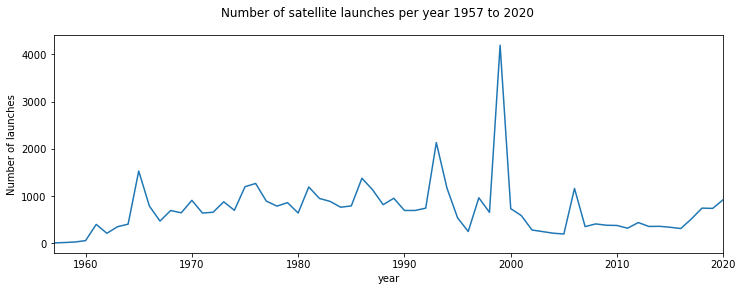

In [28]:
# ANSWER

import numpy as np
import matplotlib.pyplot as plt

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# total for all years, so sum over all months (axis 0)
n = data.sum(axis=0)
# clean way to do years
years = np.arange(1957,1957+data.shape[1])

name = f'Number of satellite launches per year {years[0]} to {years[-1]}'

# plot size 
x_size,y_size = 12,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))
fig.suptitle(name)
# plot y-data and set the label
axs.plot(years,n)
# set x-limits to get a neat graph
axs.set_xlim(years[0],years[-1])

axs.set_ylabel(f'Number of launches')
# x-label
axs.set_xlabel(f'year')

In [29]:
# ANSWER
# Print out the total number of 
# launches per month, for each month.

# use sum for total
# we can use data.shape[0] for the size of the 1st dimension
for m in range(data.shape[0]):
    print(f'{data[m].sum()} launches in month index {m}')
    

2173 launches in month index 0
3745 launches in month index 1
2895 launches in month index 2
3183 launches in month index 3
6606 launches in month index 4
5772 launches in month index 5
3279 launches in month index 6
2481 launches in month index 7
4402 launches in month index 8
4035 launches in month index 9
3273 launches in month index 10
3845 launches in month index 11


In [30]:
# ANSWER
# Print out the total number of 
# launches per year, for the years 2010 to 2020 inclusive

# use sum for total
for y in range(2010,2020+1):
    # y is a year, but we need index
    j = y - 1957
    print(f'{data[:,j].sum()} launches in year {y}')

373 launches in year 2010
315 launches in year 2011
435 launches in year 2012
352 launches in year 2013
355 launches in year 2014
335 launches in year 2015
308 launches in year 2016
512 launches in year 2017
741 launches in year 2018
735 launches in year 2019
922 launches in year 2020


### `argmin`, `argmax` and masking

Whilst we have generated some initial summary statistics on the dataset, it's not really enough to give us a good idea of the data characteristics.

To do that, we want to be able to ask somewhat more complex questions of the data, such as:

* which *year* has the most/least launches? 
* which month do most launches happen in? 
* which month in which year had the most launches? 
* which years had more than 100 launches?

Whilst we could do some of these with loops and slicing, we expect a more convenient approach for `numpy`.

To be able to address these, we need some new concepts:

* methods `argmin()` and `argmax()` that provide the *index* where the min/max occurs
* masking out array elements that meet some condition

The first set of these, `argmin()` and `argmax()` are straightforward to visualise and use:

In [31]:
import numpy as np

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# sum the data over all months (axis 0)
sum_per_year = data.sum(axis=0)
# Construct an array of years
year_array = 1957 + np.arange(data.shape[1])

# Find the location (year) with **most** launches
# Find the index of sum_per_year with highest number (argmmax)
imax = np.argmax(sum_per_year)

# Find the location (year) with **least** launches
# Find the index of sum_per_year with lowest number (argmmax)
imin = np.argmin(sum_per_year)

print(f'the year with most   launches was',\
      f'{year_array[imax]} with {sum_per_year[imax]}')
print(f'the year with fewest launches was',\
      f'{year_array[imin]} with {sum_per_year[imin]}')

the year with most   launches was 1999 with 4195
the year with fewest launches was 1957 with 3


#### Exercise 7

* Write code to print the months with highest and lowest number of launches

In [32]:
import numpy as np
# ANSWER
# Write code to print the months with 
# highest and lowest number of launches

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# sum the data over all years (axis 1)
sum_per_month = data.sum(axis=1)
# Construct an array of months
month_array = 1 + np.arange(data.shape[0])

# Find the location (month) with **most** launches
# Find the index of sum_per_month with highest number (argmmax)
imax = np.argmax(sum_per_month)

# Find the location (month) with **least** launches
# Find the index of sum_per_month with lowest number (argmmax)
imin = np.argmin(sum_per_month)

print(f'the month with most   launches was',\
      f'{month_array[imax]} with {sum_per_month[imax]}')
print(f'the month with fewest launches was',\
      f'{month_array[imin]} with {sum_per_month[imin]}')

the month with most   launches was 5 with 6606
the month with fewest launches was 1 with 2173


In section [011_Python_data_types](011_Python_data_types.ipynb#Data-types:-bool) we came across the boolean (binary) data type that can take the states `True` or `False`.

Boolean arrays in `numpy` are important in the efficient use of arrays, as they can act as a mask on an array. 

For example:

The form of filtering above (`high = sum_per_year >= 1000`) produces a numpy array of the same shape as that operated on (`sum_per_year` here) of `bool` data type.  It has entries of `True` where the condition is met, and `False` where it is not met.

In [33]:
import numpy as np

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)
# sum over all months (axis 0)
sum_per_year = data.sum(axis=0)

high = sum_per_year >= 1000
print(high)

[False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
  True False False False False  True  True False False False False False
  True  True False False False False  True False False False False False
 False  True False False False False False False False False False False
 False False False False]


We can think of this logical array as a 'data mask' that we use to select (filter) entries:

In [34]:
# form the data mask
high = (sum_per_year >= 1000)
# form an attau of years
years = 1957 + np.arange(data.shape[1])
# select only elements where mask is True
print(f'years with 1000 or more launches {years[high]}')

years with 1000 or more launches [1965 1975 1976 1981 1986 1987 1993 1994 1999 2006]


We can apply logical operators to boolean arrays:

In [35]:
low = np.logical_not(high)
print(low)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False False  True  True  True  True
 False  True  True  True  True False False  True  True  True  True  True
 False False  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


including combinations of logical arrays. 

Suppose we want to know the years after the year 2000 that have 1000 or greater launches. We can form two boolean arrays:
    
    years > 2000
    sum_per_year >= 1000
    
Since these arrays are of the same shape, we can combine them element-wise:

In [36]:
c1 = (years > 2000)
c2 = (sum_per_year >= 1000)
combined = np.logical_and(c1,c2)
print(years[combined])

[2006]


### `where`

Sometimes, instead of just applying the filter as above, we want to know the indices of the filtered values.

To do this, we can use the `np.where()` method. This takes a `bool` array as its argument (such as our data masks or other conditions) and returns a tuple of the indices where this is set `True`. 

As an example, lets find month, year pairs where the number of launches is greater than 500. 

For a final flourish, we load the dataset into `pandas` to print it in a table:

In [37]:
# find month, year where launches > 500
import numpy as np
import pandas as pd

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

month_index,year_index = np.where(data > 500)
# This gives array indices

# convert index to real month and year
# and *transpose* (swap rows and columns)
# using .T
high_launches = np.array([month_index+1,year_index+1957]).T

# load into pandas data frame 
df = pd.DataFrame(high_launches,columns=['month','year'])
df

,month,year
0,2,1986
1,5,1994
2,5,1999
3,6,1981
4,6,1993
5,6,2006
6,7,1976
7,9,1997


So `np.where()` is one way  we can derive a set of tuples such as those we saw [above](026_Numpy.ipynb#Indexing-arrays).

## Formative assessment

To get some feedback on how you are doing, you should complete and submit the formative assessment [A05 Numpy](A05_Numpy.ipynb).

### Summary

In this section, you have been introduced to the `numpy` package and more detail on arrays. The big advantages of `numpy` are that you can easily perform array operators (such as adding two arrays together), and that `numpy` has a large number of useful functions for manipulating N-dimensional data in array form. This makes it particularly appropriate for raster geospatial data processing.

We have seen how to create various forms of array (e.g. `np.ones()`, `np.arange()`), how to calculate some basic statistics (`min()`, `max()` etc), and finding the array index where some pattern occurs (e.g. `argmin()`, `argsort()` or `where()`) and how to generate and use masks for selecting data. 


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](032_GDAL_mosaicing_and_masking.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](030_NASA_MODIS_Earthdata.ipynb)

